Renseigner le chemin du fichier spectrum.fits

In [1]:
fileData = 'spectrum.fits'

In [2]:
from astropy.io import fits


import os.path
print(fileData)
if (os.path.exists(fileData)):
    print('Le fichier est présent')
else:
    print("Le fichier est faux")
data= fits.open(fileData)


spectrum.fits
Le fichier est présent


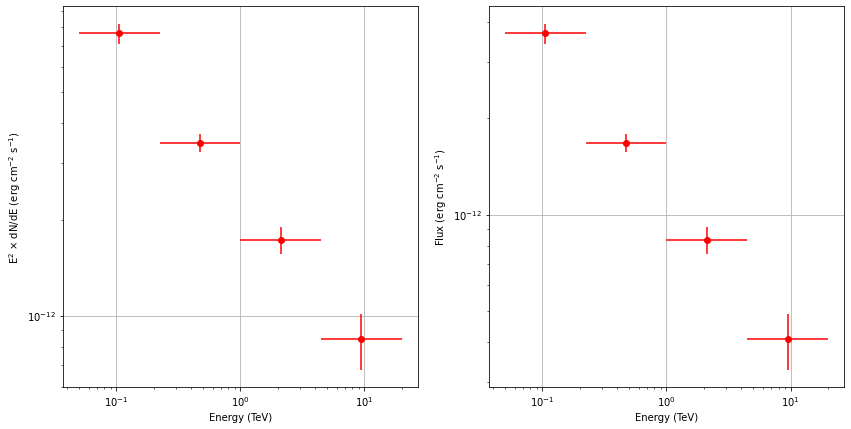

In [3]:
#! /usr/bin/env python

import matplotlib.pyplot as plt



emin=[]
emax=[]
emoy=[]
flux=[]
errflux=[]
intflux_energy = []
errintflux_energy = []
intflux_photon = []
errintflux_photon = []

for i in range(0,len(data[1].data)):
    emin.append(data[1].data[i][1])
    emax.append(data[1].data[i][2])
    emoy.append(data[1].data[i][0])
    flux.append(data[1].data[i][6]*data[1].data[i][3])
    errflux.append(data[1].data[i][6]*data[1].data[i][4])

    
    dnde = data[1].data[i][7]*data[1].data[i][3]*1e6
    intflux_energy.append(((emax[i]*1.602)**2-(emin[i]*1.602)**2)/2*(dnde/1.602))
    errintflux_energy.append(intflux_energy[i]*errflux[i]/flux[i])
    intflux_photon.append((emax[i]-emin[i])*dnde)
    errintflux_photon.append(intflux_photon[i]*errflux[i]/flux[i])

plt.figure(figsize=(14, 7))
plt.subplot(1, 2, 1)
plt.loglog()
plt.grid()
plt.errorbar(emoy, flux, yerr=errflux, xerr=[emin, emax], fmt='ro')
plt.xlabel('Energy (TeV)')
plt.ylabel(r'E$^2$ $\times$ dN/dE (erg cm$^{-2}$ s$^{-1}$)')
plt.subplot(1, 2, 2)
plt.loglog()
plt.grid()
plt.errorbar(emoy, intflux_energy, yerr=errintflux_energy, xerr=[emin, emax], fmt='ro')
plt.xlabel('Energy (TeV)')
plt.ylabel(r'Flux (erg cm$^{-2}$ s$^{-1}$)')

# Show figure
plt.show()

In [4]:
print("Energie (TeV)  Flux +/- dFlux (erg/cm*2/s)")
for i in range(len(flux)):
    print(emoy[i],intflux_energy[i],errintflux_energy[i])

Energie (TeV)  Flux +/- dFlux (erg/cm*2/s)
0.10573712634405638 3.683348619350615e-12 2.6689307577653993e-13
0.47287080450158786 1.6751352815038335e-12 1.0958105608796953e-13
2.1147425268811286 8.325134630705575e-13 7.916800758573975e-14
9.45741609003176 4.0857115575864094e-13 8.140056592981056e-14


In [5]:
print("Energie (TeV)  Flux +/- dFlux (photon/cm*2/s)")
for i in range(len(flux)):
    print(emoy[i],intflux_photon[i],errintflux_photon[i])

Energie (TeV)  Flux +/- dFlux (photon/cm*2/s)
0.10573712634405638 2.648765939253113e-11 1.91927879111273e-12
0.47287080450158786 2.693615766606105e-12 1.7620622266096494e-13
2.1147425268811286 2.9933812039487555e-13 2.8465608830777704e-14
9.45741609003176 3.284909938569146e-14 6.544601209830574e-15


In [6]:
print("Energie (TeV)  SED +/- dSED (erg/cm*2/s)")
for i in range(len(flux)):
    print(emoy[i],flux[i],errflux[i])

Energie (TeV)  SED +/- dSED (erg/cm*2/s)
0.10573712634405638 7.6364199506452e-12 5.533300860640106e-13
0.47287080450158786 3.4729366686883987e-12 2.2718646791312212e-13
2.1147425268811286 1.7259898737724055e-12 1.6413329691479473e-13
9.45741609003176 8.470609892048508e-13 1.6876189845147126e-13
